# <center>CS 4661 Homework4_Question2</center>

#### <div align = "right">Hiroko Itagaki    (CIN: 305064830) </div>

#### <div align = "right"> Yosep Kim    (CIN: 220612403) </div>



# Q2 Predict	the	probability	of	Heart	Disease	

a- In	this	question,	we	work	with	a	simplified	version	of	Heart	dataset	(remember	that	this	
dataset	 is	 a	 little	 different	 from	 what	 you	 have	 used	 in	 HW2).	 Read	 the	 dataset	 file	
“Hearts_short.csv”	 (you	 should	 download	 it	 from	 CSNS),	 and	 assign	 it	 to	 a	 Pandas	
DataFrame.	

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

csv_file = 'Heart_short.csv'
heart_df = pd.read_csv(csv_file)
heart_df.head()


,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


b- Generate	the	feature	matrix	and	label	vector	(AHD).	Then,	normalize	(scale)	the	features.		

In [38]:
# create a python list of feature names that would like to pick from the dataset:
temp_cols = heart_df.columns[:-1]
feature_cols = list(temp_cols)

y_temp = heart_df.columns[-1:]
last_col = list(y_temp)

# use the above list to select the features from the original DataFrame
X = heart_df[list(temp_cols)]

# select a Series of labels (the last column) from the DataFrame
y = heard_df[list(y_temp)]
print(X.head())
print(y.head())

   Age  RestBP  Chol  RestECG  MaxHR  Oldpeak
0   63     145   233        2    150      2.3
1   67     160   286        2    108      1.5
2   67     120   229        2    129      2.6
3   37     130   250        0    187      3.5
4   41     130   204        2    172      1.4
   AHD
0   No
1  Yes
2  Yes
3   No
4   No


## Normalize (scale) the features.

In [39]:
for f  in feature_cols:
    max_feature = heart_df[f].max()
    heart_df[f]= heart_df[f]/max_feature
X= heart_df[feature_cols]
X.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,0.818182,0.725,0.413121,1.0,0.742574,0.370968
1,0.870130,0.800,0.507092,1.0,0.534653,0.241935
2,0.870130,0.600,0.406028,1.0,0.638614,0.419355
3,0.480519,0.650,0.443262,0.0,0.925743,0.564516
4,0.532468,0.650,0.361702,1.0,0.851485,0.225806


c- Split	 the	 dataset	 into	 testing	 and	 training	 sets	 with	 the	 following	 parameters:	
test_size=0.2,	random_state=3.	

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(224, 6)
(224, 1)
(57, 6)
(57, 1)


d- Use	 Logistic	 Regression	 Classifier	 to	 predict	 Heart	 Disease	 occurrence	 based	 on	 the	
training/testing	datasets	that	you	built	in	part(c).	Then,	compute	and	report	the	Accuracy.		

In [54]:
my_logreg = LogisticRegression()
# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)

print(y_predict_lr)
score_lr = accuracy_score(y_test, y_predict_lr)

print("The accuracy score: ", score_lr)


['No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No']
The accuracy score:  0.719298245614


/home/cowboyuniverse/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Use	Logistic	Regression	Classifier	to	predict	the	probability	of	Heart	Disease	based	on	the	
training/testing	datasets	that	you	built	in	part	(c)	(you	have	to	use	“my_logreg.predict_proba”	
method	rather	than	“my_logreg.predict”).	Then,	Plot	the	Roc	Curve	for	this	classifier,	and	also	
Compute	the	AUC	(Area	Under	Curve	for	ROC).	

In [55]:

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])


[[ 0.54236498  0.45763502]
 [ 0.49169739  0.50830261]
 [ 0.59935115  0.40064885]
 [ 0.5676068   0.4323932 ]
 [ 0.73307747  0.26692253]
 [ 0.66929693  0.33070307]
 [ 0.64766974  0.35233026]
 [ 0.78401267  0.21598733]
 [ 0.53144415  0.46855585]
 [ 0.6383591   0.3616409 ]
 [ 0.27965949  0.72034051]
 [ 0.82392552  0.17607448]
 [ 0.42056322  0.57943678]
 [ 0.5388658   0.4611342 ]
 [ 0.63595389  0.36404611]
 [ 0.78380419  0.21619581]
 [ 0.28187821  0.71812179]
 [ 0.63600438  0.36399562]
 [ 0.31417886  0.68582114]
 [ 0.47189868  0.52810132]
 [ 0.77698862  0.22301138]
 [ 0.70871789  0.29128211]
 [ 0.43480471  0.56519529]
 [ 0.82738236  0.17261764]
 [ 0.3912408   0.6087592 ]
 [ 0.47432641  0.52567359]
 [ 0.66524602  0.33475398]
 [ 0.54691832  0.45308168]
 [ 0.59812688  0.40187312]
 [ 0.70636273  0.29363727]
 [ 0.46876928  0.53123072]
 [ 0.40641578  0.59358422]
 [ 0.25279187  0.74720813]
 [ 0.73551083  0.26448917]
 [ 0.66729423  0.33270577]
 [ 0.11696564  0.88303436]
 [ 0.20887111  0.79112889]
 

In [102]:
# from sklearn import metrics
def convert_from_string_to_binary(list_a):
    temp_list = []
    for item in list_a:
        if item[:1] == 'No':
            temp_list.append(0.0)
        else:
            temp_list.append(1.0)
    return temp_list


y_test_list = y_test.values
converted_y_test_list = convert_from_string_to_binary(y_test_list)


fpr, tpr, thresholds = metrics.roc_curve(converted_y_test_list, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[ 0.          0.03333333  0.03333333  0.06666667  0.06666667  0.1         0.1
  0.13333333  0.13333333  0.16666667  0.16666667  0.2         0.2
  0.26666667  0.26666667  0.4         0.4         0.43333333  0.43333333
  0.63333333  0.63333333  0.7         0.7         0.83333333  0.83333333
  0.9         0.9         1.        ]
[ 0.03703704  0.03703704  0.25925926  0.25925926  0.40740741  0.40740741
  0.44444444  0.44444444  0.55555556  0.55555556  0.59259259  0.59259259
  0.66666667  0.66666667  0.7037037   0.7037037   0.74074074  0.74074074
  0.81481481  0.81481481  0.85185185  0.85185185  0.88888889  0.88888889
  0.92592593  0.92592593  1.          1.        ]


In [103]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.73950617284


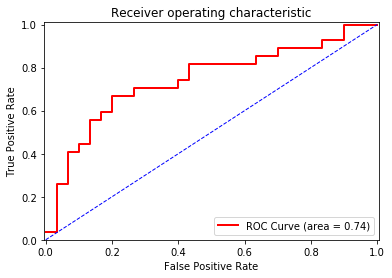

In [104]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()